## Урок 5. Тема “POS-tagger и NER”
 
###Задание 2. Проверить насколько хорошо работает NER
данные брать из http://www.labinform.ru/pub/named_entities/
- проверить NER из nltk/spacy/deeppavlov
- написать свой нер попробовать разные подходы
-- передаём в сетку токен и его соседей
-- передаём в сетку только токен
- сделать выводы по вашим экспериментам какой из подходов успешнее справляется


In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib
%matplotlib inline
from tqdm.notebook import tqdm
from nltk.tokenize import word_tokenize

In [3]:
!wget http://www.labinform.ru/pub/named_entities/collection5.zip

--2022-06-08 17:54:19--  http://www.labinform.ru/pub/named_entities/collection5.zip
Resolving www.labinform.ru (www.labinform.ru)... 95.181.230.181
Connecting to www.labinform.ru (www.labinform.ru)|95.181.230.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1899530 (1.8M) [application/zip]
Saving to: ‘collection5.zip.1’

collection5.zip.1   100%[===================>]   1.81M  1.55MB/s    in 1.2s    

2022-06-08 17:54:21 (1.55 MB/s) - ‘collection5.zip.1’ saved [1899530/1899530]



In [ ]:
!unzip collection5.zip

In [3]:
!pip install corus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.6 MB/s 


In [5]:
import corus

In [78]:
from corus import load_ne5

dir = 'Collection5/'
records = load_ne5(dir)
rec = next(records)

In [79]:
rec = next(records)
rec.text

'\r\nПолковник Соболь назначен главным инспектором МВД РФ\r\n\r\n\r\nИнформация о назначении опубликована на сайте Кремля.\r\n\r\nПрезидент РФ назначил полковника полиции Эдуарда Соболя главным инспектором МВД РФ, соответствующий документ размещен на сайте Кремля.\r\n\r\n"Назначить <…> полковника полиции Соболя Эдуарда Юрьевича — главным инспектором министерства внутренних дел Российской Федерации", — говорится в указе.'

In [80]:
rec.spans

[Ne5Span(
     index='T1',
     type='PER',
     start=12,
     stop=18,
     text='Соболь'
 ), Ne5Span(
     index='T2',
     type='ORG',
     start=48,
     stop=51,
     text='МВД'
 ), Ne5Span(
     index='T3',
     type='GEOPOLIT',
     start=52,
     stop=54,
     text='РФ'
 ), Ne5Span(
     index='T4',
     type='GEOPOLIT',
     start=106,
     stop=112,
     text='Кремля'
 ), Ne5Span(
     index='T5',
     type='GEOPOLIT',
     start=127,
     stop=129,
     text='РФ'
 ), Ne5Span(
     index='T6',
     type='PER',
     start=158,
     stop=172,
     text='Эдуарда Соболя'
 ), Ne5Span(
     index='T7',
     type='ORG',
     start=193,
     stop=196,
     text='МВД'
 ), Ne5Span(
     index='T8',
     type='GEOPOLIT',
     start=197,
     stop=199,
     text='РФ'
 ), Ne5Span(
     index='T9',
     type='GEOPOLIT',
     start=244,
     stop=250,
     text='Кремля'
 ), Ne5Span(
     index='T10',
     type='PER',
     start=289,
     stop=312,
     text='Соболя Эдуарда Юрьевича'
 ), Ne

In [60]:
!pip install razdel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
from razdel import tokenize

In [82]:
words_docs = []
for ix, rec in enumerate(records):
    words = []
    for token in tokenize(rec.text):
        type_ent = 'OUT'
        for ent in rec.spans:
            if (token.start >= ent.start) and (token.stop <= ent.stop):
                type_ent = ent.type
                break
        words.append([token.text, type_ent])
    words_docs.extend(words)

In [83]:
words_docs[:10], len(words_docs)

([['Мать', 'OUT'],
  ['Майкла', 'PER'],
  ['Джексона', 'PER'],
  ['рассказала', 'OUT'],
  [',', 'OUT'],
  ['как', 'OUT'],
  ['она', 'OUT'],
  ['«', 'OUT'],
  ['исчезла', 'OUT'],
  ['»', 'OUT']],
 265231)

In [91]:
records = load_ne5(dir)

In [92]:
articals = [rec.text for rec in records]

In [93]:
articals[:5], len(articals)

(['Эдвард Налбандян встретился в Одессе с главами МИД Украины и Молдавии\r\n\r\nМинистр иностранных дел Армении Эдвард Налбандян в рамках заседания Совета глав МИД стран Организации черноморского экономического сотрудничества (ОЧЭС) провел в Одессе ряд двусторонних встреч.\r\n\r\nКак сообщили ИА REGNUM в пресс-службе МИД Армении, на встрече с главой МИД Украины Леонидом Кожарой был обсужден ход реализации договоренностей, достигнутых президентами двух стран и проведение межмидовских консультаций. В контексте председательства Украины в ОБСЕ собеседники затронули вопросы повестки организации, сроки предстоящего визита действующего председателя организации в регион, процесс урегулирования нагорно-карабахского конфликта.\r\n\r\nГлава МИД Армении также встретился с вице-премьером, министром иностранных дел и европейской интеграции Молдавии Натальей Герман. Налбандян поздравил ее с назначением на должность, выразив надежду, что после формирования нового правительства в Молдавии будут предпри

In [94]:
doc1 = articals[1]
doc1

'\r\nПолковник Соболь назначен главным инспектором МВД РФ\r\n\r\n\r\nИнформация о назначении опубликована на сайте Кремля.\r\n\r\nПрезидент РФ назначил полковника полиции Эдуарда Соболя главным инспектором МВД РФ, соответствующий документ размещен на сайте Кремля.\r\n\r\n"Назначить <…> полковника полиции Соболя Эдуарда Юрьевича — главным инспектором министерства внутренних дел Российской Федерации", — говорится в указе.'

In [95]:
import pandas as pd

In [96]:
df_words = pd.DataFrame(words_docs, columns=['word', 'tag'])

In [49]:
df_words['tag'].value_counts()

OUT         218527
PER          21142
ORG          13634
LOC           4559
GEOPOLIT      4339
MEDIA         2473
Name: tag, dtype: int64

In [97]:
df_words.head()

,word,tag
0,Мать,OUT
1,Майкла,PER
2,Джексона,PER
3,рассказала,OUT
4,",",OUT


In [98]:
df_words.shape

(265231, 2)

In [100]:
df_words.info

<bound method DataFrame.info of               word  tag
0             Мать  OUT
1           Майкла  PER
2         Джексона  PER
3       рассказала  OUT
4                ,  OUT
...            ...  ...
265226        июне  OUT
265227           с  OUT
265228           .  OUT
265229           г  OUT
265230           .  OUT

[265231 rows x 2 columns]>

In [101]:
# Для разметки NER с помощью NLTK сначала производим токенизацию слов, затем POS тэггинг. 

In [102]:
import nltk
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('names')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [103]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [104]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [105]:
import tqdm
words5 = list(df_words.word)

In [ ]:
words5

In [ ]:
#data5_tok = [nltk.word_tokenize(x) for x in words5]
#data5_tag = [nltk.pos_tag(x) for x in data5_tok[:50000]]

In [109]:
data5_tag = nltk.pos_tag(words5[:20000])

In [110]:
data5_tag[:10]

[('Мать', 'JJ'),
 ('Майкла', 'NNP'),
 ('Джексона', 'NNP'),
 ('рассказала', 'NNP'),
 (',', ','),
 ('как', 'NNP'),
 ('она', 'NNP'),
 ('«', 'NNP'),
 ('исчезла', 'NNP'),
 ('»', 'NNP')]

С помощью функции nltk.ne_chunk () (уже оттренированный классификатор) мы можем распознавать именованные сущности с помощью классификатора, который добавляет метки категорий, такие как PERSON, ORGANIZATION и GPE.

In [111]:
{(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(words5[:50000])) if hasattr(chunk, 'label') }

{('России Владимир Путин', 'PERSON'),
 ('Медведева', 'PERSON'),
 ('Леонид Слуцкий', 'PERSON'),
 ('Украину', 'PERSON'),
 ('Андрей Кибитов', 'PERSON'),
 ('Нельсона Манделы Мандла Мандела Суд', 'PERSON'),
 ('Брянске', 'PERSON'),
 ('Шляхтуров', 'PERSON'),
 ('Меня', 'PERSON'),
 ('New York', 'GPE'),
 ('Сергеевич Кравцов', 'PERSON'),
 ('Мирланд Манига', 'PERSON'),
 ('Владимира', 'GPE'),
 ('Associater', 'ORGANIZATION'),
 ('Людмиле Линик', 'PERSON'),
 ('Критики', 'PERSON'),
 ('Колымы Владимир Печеный Избирательная', 'PERSON'),
 ('Хаммарберг', 'PERSON'),
 ('Чабана', 'PERSON'),
 ('Тимур Шаймиев', 'PERSON'),
 ('Осетии', 'PERSON'),
 ('Пропал', 'PERSON'),
 ('Юрия Пахомовского', 'PERSON'),
 ('Виталий Улитка', 'PERSON'),
 ('Duracell', 'ORGANIZATION'),
 ('Центрального Банка России', 'PERSON'),
 ('Мурино', 'PERSON'),
 ('Алексей Моисеев', 'PERSON'),
 ('Фатин', 'PERSON'),
 ('Кремль', 'PERSON'),
 ('Израиля Биньямином Нетаньяху', 'PERSON'),
 ('Здесь', 'PERSON'),
 ('Habib', 'PERSON'),
 ('Румынии Траяна Бэсес

In [113]:
# возьмем одну небольшую статью и посмотрим разные NER
test_doc = articals[6]
test_doc

'Вице-губернатор Санкт-Петербурга подала в отставку\r\n\r\nВице-губернатор Санкт-Петербурга Алла Манилова подала прошение об отставке. Об этом сообщает "Интерфакс" со ссылкой на источник в петербургском правительстве. По данным источника, место Маниловой займет некий человек из команды нового главы Санкт-Петербурга Георгия Полтавченко.\r\n\r\nВ то же время, начальник управления информации правительства города Андрей Кибитов отказался давать официальные комментарии по поводу отставки Маниловой и назвал сведения о перестановках в руководстве Санкт-Петербурга "слухами".\r\n\r\nМанилова пришла на работу в правительство города вместе с Валентиной Матвиенко в 2003 году. Первоначально она была главой комитета по печати, а с 2008 года стала вице-губернатором. На своем посту она курировала СМИ, культуру, образование и науку.\r\n\r\nМанилова стала первой из вице-губернаторов правительства Матвиенко, решившей уйти в отставку после смены главы правительства Санкт-Петербурга. РИА Новости напоминает

In [114]:
{(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(test_doc))) if hasattr(chunk, 'label') }

{('Андрей Кибитов', 'PERSON'),
 ('Валентина Матвиенко', 'ORGANIZATION'),
 ('Георгий Полтавченко', 'PERSON'),
 ('Георгия Полтавченко', 'PERSON'),
 ('Манилова', 'PERSON'),
 ('Новости', 'PERSON'),
 ('Предполагается', 'PERSON'),
 ('Совета Федерации', 'PERSON')}

#Spacy

In [115]:
!pip -q install spacy
!python -m spacy download en
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 7.8 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 6.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [116]:
!pip install -U spacy
!python -m spacy info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.2 MB 8.2 MB/s 
     |████████████████████████████████| 181 kB 57.2 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 660 kB 62.0 MB/s 
     |████████████████████████████████| 457 kB 53.1 MB/s 
     |████████████████████████████████| 10.1 MB 48.5 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srs

In [117]:
import spacy
from spacy import displacy
from spacy.lang.ru import Russian

#nlp = Russian()
#ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
#article = nlp(rec.text)


In [118]:
!python -m spacy download ru_core_news_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.9 MB 29.5 MB/s 
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 8.2 MB 32.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


In [119]:
import ru_core_news_md
nlp = ru_core_news_md.load()

In [120]:
doc = nlp(test_doc)
for ent in doc.ents:
    print(ent.text, ent.label_)

Санкт-Петербурга LOC
Санкт-Петербурга LOC
Алла Манилова PER
Интерфакс ORG
Маниловой PER
Санкт-Петербурга LOC
Георгия Полтавченко PER
Андрей Кибитов PER
Маниловой PER
Санкт-Петербурга LOC
Манилова PER
Валентиной Матвиенко PER
СМИ ORG
Манилова PER
Матвиенко PER
Санкт-Петербурга LOC
РИА Новости ORG
Петроградского района LOC
Константин Желудков PER
Санкт-Петербурга LOC
Валентина Матвиенко PER
Совета Федерации ORG
Санкт-Петербурга LOC
Георгий Полтавченко PER
Центральном федеральном округе LOC


In [121]:
for named_entity in doc.ents:
    if named_entity.label_ == "PER":
        print(named_entity)

Алла Манилова
Маниловой
Георгия Полтавченко
Андрей Кибитов
Маниловой
Манилова
Валентиной Матвиенко
Манилова
Матвиенко
Константин Желудков
Валентина Матвиенко
Георгий Полтавченко


In [122]:
displacy.render(doc, jupyter=True, style='ent')

# deeppavlov

In [ ]:
#!python -m venv env 
# #.\env\Scripts\activate.bat
#!pip install deeppavlov
#!python -m deeppavlov install squad_bert
#!python -m deeppavlov install ner_ontonotes

In [ ]:
'''import deeppavlov
from deeppavlov import configs, build_model
deeppavlov_ner = build_model(configs.ner, download=True)
rus_document = "Нью-Йорк, США, 30 апреля 2020, 01:01 — REGNUM В администрации президента США Дональда Трампа планируют пройти все этапы создания вакцины от коронавируса в ускоренном темпе и выпустить 100 млн доз до конца 2020 года, передаёт агентство Bloomberg со ссылкой на осведомлённые источники"
deeppavlov_ner([rus_document])'''

In [123]:
!pip install deeppavlov

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 878 kB 8.1 MB/s 
     |████████████████████████████████| 1.5 MB 47.4 MB/s 
     |████████████████████████████████| 510 kB 59.0 MB/s 
     |████████████████████████████████| 40 kB 19 kB/s 
     |████████████████████████████████| 57 kB 6.4 MB/s 
     |████████████████████████████████| 859 kB 59.9 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 10.4 MB 49.7 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 6.7 MB 23.9 MB/s 
     |████████████████████████████████| 2.9 MB 47.2 MB/s 
     |████████████████████████████████| 55 kB 4.5 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 65 kB 4.4 MB/s 
     |████████████████████████████████| 76 kB 

In [124]:
!python -m deeppavlov install ner_rus_bert_torch

2022-06-08 18:21:28.556 INFO in 'deeppavlov.core.common.file'['file'] at line 32: Interpreting 'ner_rus_bert_torch' as '/usr/local/lib/python3.7/dist-packages/deeppavlov/configs/ner/ner_rus_bert_torch.json'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 9.2 MB/s 
     |████████████████████████████████| 3.3 MB 48.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748.8 MB 19 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.12.0+cu113 requires torch==1.11.0, but you have torch 1.6.0 whic

In [125]:
from deeppavlov import configs, build_model

ner_model = build_model(configs.ner.ner_rus_bert_torch, download=True)

# [[['Bob', 'Ross', 'lived', 'in', 'Florida']], [['B-PERSON', 'I-PERSON', 'O', 'O', 'B-GPE']]]

2022-06-08 18:23:23.99 INFO in 'deeppavlov.core.data.utils'['utils'] at line 95: Downloading from http://files.deeppavlov.ai/0.16/ner/ner_rus_bert_torch.tar.gz to /root/.deeppavlov/ner_rus_bert_torch.tar.gz
100%|██████████| 1.43G/1.43G [01:12<00:00, 19.7MB/s]
2022-06-08 18:24:36.768 INFO in 'deeppavlov.core.data.utils'['utils'] at line 272: Extracting /root/.deeppavlov/ner_rus_bert_torch.tar.gz archive into /root/.deeppavlov/models
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping corpora/nonbreaking_prefixes.zip.


Downloading:   0%|          | 0.00/642 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

2022-06-08 18:24:58.379 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /root/.deeppavlov/models/ner_rus_bert_torch/tag.dict]


Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initializ

In [127]:
# в модели ограничение стоит на количество токенов 512, это неудобно, нужно резать данные на предложения
dpavlov_tags = ner_model([test_doc[:512]])
print(dpavlov_tags)

[[['Вице', '-', 'губернатор', 'Санкт', '-', 'Петербурга', 'подала', 'в', 'отставку', '\r', '\n', '\r', '\n', 'Вице', '-', 'губернатор', 'Санкт', '-', 'Петербурга', 'Алла', 'Манилова', 'подала', 'прошение', 'об', 'отставке', '.', 'Об', 'этом', 'сообщает', '"', 'Интерфакс', '"', 'со', 'ссылкой', 'на', 'источник', 'в', 'петербургском', 'правительстве', '.', 'По', 'данным', 'источника', ',', 'место', 'Маниловой', 'займет', 'некий', 'человек', 'из', 'команды', 'нового', 'главы', 'Санкт', '-', 'Петербурга', 'Георгия', 'Полтавченко', '.', '\r', '\n', '\r', '\n', 'В', 'то', 'же', 'время', ',', 'начальник', 'управления', 'информации', 'правительства', 'города', 'Андрей', 'Кибитов', 'отказался', 'давать', 'официальные', 'комментарии', 'по', 'поводу', 'отставки', 'Маниловой', 'и', 'назвал', 'сведения', 'о', 'пер']], [['O', 'O', 'O', 'B-LOC', 'I-LOC', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'I-LOC', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

In [130]:
len(dpavlov_tags[1][0]), len(dpavlov_tags[0][0])

(88, 88)

In [131]:
dpavlov_tags[0][0][85], dpavlov_tags[1][0][85]

('сведения', 'O')

In [132]:
for i in range(len(dpavlov_tags[0][0])):
  print(dpavlov_tags[0][0][i], dpavlov_tags[1][0][i])
  

Вице O
- O
губернатор O
Санкт B-LOC
- I-LOC
Петербурга I-LOC
подала O
в O
отставку O
 O

 O
 O

 O
Вице O
- O
губернатор O
Санкт B-LOC
- I-LOC
Петербурга I-LOC
Алла B-PER
Манилова I-PER
подала O
прошение O
об O
отставке O
. O
Об O
этом O
сообщает O
" O
Интерфакс B-ORG
" O
со O
ссылкой O
на O
источник O
в O
петербургском O
правительстве O
. O
По O
данным O
источника O
, O
место O
Маниловой B-PER
займет O
некий O
человек O
из O
команды O
нового O
главы O
Санкт B-LOC
- I-LOC
Петербурга I-LOC
Георгия B-PER
Полтавченко I-PER
. O
 O

 O
 O

 O
В O
то O
же O
время O
, O
начальник O
управления O
информации O
правительства O
города O
Андрей B-PER
Кибитов I-PER
отказался O
давать O
официальные O
комментарии O
по O
поводу O
отставки O
Маниловой B-PER
и O
назвал O
сведения O
о O
пер O


In [133]:
ner_model(['Bob Ross lived in Florida'])

[[['Bob', 'Ross', 'lived', 'in', 'Florida']],
 [['B-PER', 'I-PER', 'O', 'O', 'B-LOC']]]

In [135]:
ner_model(['Папа Карло выстругал Буратино и  жил во Флориде'])

[[['Папа', 'Карло', 'выстругал', 'Буратино', 'и', 'жил', 'во', 'Флориде']],
 [['O', 'B-PER', 'O', 'B-PER', 'O', 'O', 'O', 'B-LOC']]]

#Natasha

In [136]:
!pip install natasha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.4 MB 8.1 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 41 kB 140 kB/s 
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26119 sha256=f0c7f0225769b1e24034e6e27163c3d184130e201527a462eaafb700d6d59176
  Stored in directory: /root/.cache/pip/wheels/16/85/bd/1001cbb46dcfb71c2001cd7401c6fb250392f22a81ce3722f7
Successfully built intervaltree
  Attempting uninstall: intervaltree
    Found existing installation: intervaltree 2.1.0
    Uninstalling intervaltree-2.1.0:
      Successfully uninstalled intervaltree-2.1.0


In [138]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

In [139]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

#text = 'Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. «Я не могу понять, как прославление тех, кто непосредственно принимал участие в ужасных антисемитских преступлениях, помогает бороться с антисемитизмом и ксенофобией. Украина не должна забывать о преступлениях, совершенных против украинских евреев, и никоим образом не отмечать их через почитание их исполнителей», — написал дипломат. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года). В июле аналогичное решение принял Житомирский областной совет. В начале месяца с предложением к президенту страны Петру Порошенко вернуть Бандере звание Героя Украины обратились депутаты Верховной Рады. Парламентарии уверены, что признание Бандеры национальным героем поможет в борьбе с подрывной деятельностью против Украины в информационном поле, а также остановит «распространение мифов, созданных российской пропагандой». Степан Бандера (1909-1959) был одним из лидеров Организации украинских националистов, выступающей за создание независимого государства на территориях с украиноязычным населением. В 2010 году в период президентства Виктора Ющенко Бандера был посмертно признан Героем Украины, однако впоследствии это решение было отменено судом. '
doc = Doc(test_doc)

In [140]:
doc.segment(segmenter)
display(doc.tokens[:5])
display(doc.sents[:5])

[DocToken(stop=15, text='Вице-губернатор'),
 DocToken(start=16, stop=32, text='Санкт-Петербурга'),
 DocToken(start=33, stop=39, text='подала'),
 DocToken(start=40, stop=41, text='в'),
 DocToken(start=42, stop=50, text='отставку')]

[DocSent(stop=129, text='Вице-губернатор Санкт-Петербурга подала в отставк..., tokens=[...]),
 DocSent(start=130, stop=212, text='Об этом сообщает "Интерфакс" со ссылкой на источн..., tokens=[...]),
 DocSent(start=213, stop=332, text='По данным источника, место Маниловой займет некий..., tokens=[...]),
 DocSent(start=336, stop=564, text='В то же время, начальник управления информации пр..., tokens=[...]),
 DocSent(start=568, stop=659, text='Манилова пришла на работу в правительство города ..., tokens=[...])]

In [141]:
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)
sent = doc.sents[0]
sent.morph.print()

     Вице-губернатор NOUN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
    Санкт-Петербурга PROPN|Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing
              подала VERB|Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act
                   в ADP
            отставку NOUN|Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing
     Вице-губернатор PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
    Санкт-Петербурга PROPN|Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing
                Алла PROPN|Animacy=Anim|Case=Nom|Gender=Fem|Number=Sing
            Манилова PROPN|Animacy=Anim|Case=Nom|Gender=Fem|Number=Sing
              подала VERB|Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act
            прошение NOUN|Animacy=Inan|Case=Acc|Gender=Neut|Number=Sing
                  об ADP
            отставке NOUN|Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing
                   . PUNCT


In [142]:
sent.syntax.print()

      ┌► Вице-губернатор  nsubj
      │  Санкт-Петербурга 
┌─┌─┌─└─ подала           
│ │ │ ┌► в                case
│ │ └►└─ отставку         obl
│ └►┌─┌─ Вице-губернатор  nsubj
│   │ └► Санкт-Петербурга nmod
│   └►┌─ Алла             appos
│     └► Манилова         flat:name
│     ┌─ подала           
│   ┌─└► прошение         obj
│   │ ┌► об               case
│   └►└─ отставке         nmod
└──────► .                punct


Модуль извлечения именованных сущностей не зависит от результатов морфологического и синтаксического разбора, его можно использовать отдельно.

In [143]:
doc.tag_ner(ner_tagger)
doc.ner.print()

Вице-губернатор Санкт-Петербурга подала в отставку
                LOC─────────────                  
Вице-губернатор Санкт-Петербурга Алла Манилова подала прошение об 
                LOC───────────── PER──────────                    
отставке. Об этом сообщает "Интерфакс" со ссылкой на источник в 
                            ORG──────                           
петербургском правительстве. По данным источника, место Маниловой 
                                                        PER────── 
займет некий человек из команды нового главы Санкт-Петербурга Георгия 
                                             LOC───────────── PER─────
Полтавченко.
─────────── 
В то же время, начальник управления информации правительства города 
Андрей Кибитов отказался давать официальные комментарии по поводу 
PER───────────                                                    
отставки Маниловой и назвал сведения о перестановках в руководстве 
         PER──────                                           

##Spacy и Natasha dpavlov отработали NER лучше nltk 

- написать свой нер попробовать разные подходы
-- передаём в сетку токен и его соседей
-- передаём в сетку только токен
- сделать выводы по вашим экспериментам какой из подходов успешнее справляется

In [144]:
!wget http://www.labinform.ru/pub/named_entities/collection5.zip

--2022-06-08 18:30:58--  http://www.labinform.ru/pub/named_entities/collection5.zip
Resolving www.labinform.ru (www.labinform.ru)... 95.181.230.181
Connecting to www.labinform.ru (www.labinform.ru)|95.181.230.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1899530 (1.8M) [application/zip]
Saving to: ‘collection5.zip.2’

collection5.zip.2   100%[===================>]   1.81M  1.55MB/s    in 1.2s    

2022-06-08 18:31:00 (1.55 MB/s) - ‘collection5.zip.2’ saved [1899530/1899530]



In [ ]:
!unzip collection5.zip

In [146]:
!pip install corus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
import corus

In [148]:
from corus import load_ne5

dir = 'Collection5/'
records = load_ne5(dir)
rec = next(records)

In [149]:
!pip install razdel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
from razdel import tokenize

In [152]:
words_docs = []
for ix, rec in enumerate(records):
    words = []
    for token in tokenize(rec.text):
        type_ent = 'OUT'
        for ent in rec.spans:
            if (token.start >= ent.start) and (token.stop <= ent.stop):
                type_ent = ent.type
                break
        words.append([token.text, type_ent])
    words_docs.extend(words)

In [159]:
articals = []
for rec in records:
    articals.append(rec.text)

In [160]:
records = load_ne5(dir)

In [161]:
doc1 = articals[1]
doc1

'\r\nПолковник Соболь назначен главным инспектором МВД РФ\r\n\r\n\r\nИнформация о назначении опубликована на сайте Кремля.\r\n\r\nПрезидент РФ назначил полковника полиции Эдуарда Соболя главным инспектором МВД РФ, соответствующий документ размещен на сайте Кремля.\r\n\r\n"Назначить <…> полковника полиции Соболя Эдуарда Юрьевича — главным инспектором министерства внутренних дел Российской Федерации", — говорится в указе.'

In [162]:
import pandas as pd

In [163]:
df_words = pd.DataFrame(words_docs, columns=['word', 'tag'])

In [164]:
df_words['tag'].value_counts()

OUT         219072
PER          21189
ORG          13636
LOC           4566
GEOPOLIT      4347
MEDIA         2480
Name: tag, dtype: int64

In [165]:
df_words.head()

,word,tag
0,Полковник,OUT
1,Соболь,PER
2,назначен,OUT
3,главным,OUT
4,инспектором,OUT


In [207]:
df_words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265290 entries, 0 to 265289
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   word    265290 non-null  object
 1   tag     265290 non-null  object
dtypes: object(2)
memory usage: 4.0+ MB


In [167]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, GlobalMaxPooling1D, Conv1D, GRU, LSTM, Dropout, Input
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [168]:
from sklearn import model_selection, preprocessing, linear_model

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_words['word'], df_words['tag'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.transform(valid_y) #fit_transform

In [209]:
train_y

array([4, 4, 3, ..., 4, 5, 4])

In [210]:
train_x.apply(len).max(axis=0)

55

In [ ]:
# char level
#train_x = train_x.apply(lambda x: ' '.join(list(x)))
#valid_x = valid_x.apply(lambda x: ' '.join(list(x)))

In [173]:
train_data = tf.data.Dataset.from_tensor_slices((train_x, train_y))
valid_data = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

train_data = train_data.batch(16)
valid_data = valid_data.batch(16)

In [175]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

In [172]:
def custom_standardization(input_data):
    return input_data

vocab_size = 30000
seq_len = 10

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    #ngrams=(1, 3),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)

In [176]:
len(vectorize_layer.get_vocabulary())

29789

In [185]:
embedding_dim = 128

class modelNER(tf.keras.Model):
    def __init__(self):
        super(modelNER, self).__init__()
        self.emb = Embedding(vocab_size, embedding_dim)
        self.gPool = GlobalMaxPooling1D()
        self.fc1 = Dense(300, activation='relu')
        self.fc2 = Dense(50, activation='relu')
        self.fc3 = Dense(6, activation='softmax')

    def call(self, x):
        x = vectorize_layer(x)
        x = self.emb(x)
        pool_x = self.gPool(x)
        
        fc_x = self.fc1(pool_x)
        fc_x = self.fc2(fc_x)
        
        concat_x = tf.concat([pool_x, fc_x], axis=1)
        prob = self.fc3(concat_x)
        return prob

In [186]:
mmodel = modelNER()

In [190]:
mmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [195]:
mmodel.fit(train_data, validation_data=valid_data, epochs=3)

Epoch 1/3
12436/12436 [==============================] - 83s 6ms/step - loss: 0.2830 - accuracy: 0.9179 - val_loss: 0.2079 - val_accuracy: 0.9372
Epoch 2/3
12436/12436 [==============================] - 74s 6ms/step - loss: 0.1207 - accuracy: 0.9637 - val_loss: 0.3222 - val_accuracy: 0.8906
Epoch 3/3
12436/12436 [==============================] - 74s 6ms/step - loss: 0.1061 - accuracy: 0.9662 - val_loss: 0.3122 - val_accuracy: 0.8907


In [196]:
from sklearn.metrics import confusion_matrix, classification_report,f1_score, accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [197]:
preds = mmodel.predict(valid_x)
preds = np.argmax(preds,axis=1)
print(f1_score(valid_y, preds, average= "weighted"))

0.8983132309826692


In [198]:
classes = encoder.classes_
classes

array(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'], dtype=object)

In [ ]:
preds

In [199]:
from sklearn import metrics

print(metrics.classification_report(valid_y, preds))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1085
           1       0.84      0.77      0.80      1129
           2       0.93      0.77      0.84       629
           3       0.82      0.58      0.68      3351
           4       0.97      0.92      0.94     54778
           5       0.49      0.88      0.63      5351

    accuracy                           0.89     66323
   macro avg       0.82      0.80      0.80     66323
weighted avg       0.92      0.89      0.90     66323



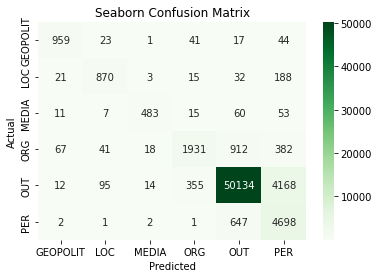

In [200]:
import seaborn as sns

cm = confusion_matrix(valid_y, preds)
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Greens");

ax.set_title('Seaborn Confusion Matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])
ax.yaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])

plt.show()

In [201]:
#добавим биграммы и триграммы
def custom_standardization(input_data):
    return input_data

vocab_size = 30000
seq_len = 10

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    ngrams=(1, 3),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)


In [204]:
vectorize_layer.adapt(text_data)
mmodel1 = modelNER()
mmodel1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
mmodel1.fit( train_data,
            validation_data=valid_data,
            epochs=3)

Epoch 1/3
12436/12436 [==============================] - 97s 8ms/step - loss: 0.2857 - accuracy: 0.9175 - val_loss: 0.2085 - val_accuracy: 0.9379
Epoch 2/3
12436/12436 [==============================] - 83s 7ms/step - loss: 0.1214 - accuracy: 0.9639 - val_loss: 0.2615 - val_accuracy: 0.8824
Epoch 3/3
12436/12436 [==============================] - 82s 7ms/step - loss: 0.1064 - accuracy: 0.9661 - val_loss: 0.2392 - val_accuracy: 0.9382


0.9343350860612372
--------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1085
           1       0.84      0.78      0.81      1129
           2       0.93      0.77      0.84       629
           3       0.79      0.58      0.67      3351
           4       0.94      0.99      0.97     54778
           5       0.99      0.71      0.82      5351

    accuracy                           0.94     66323
   macro avg       0.90      0.78      0.83     66323
weighted avg       0.94      0.94      0.93     66323



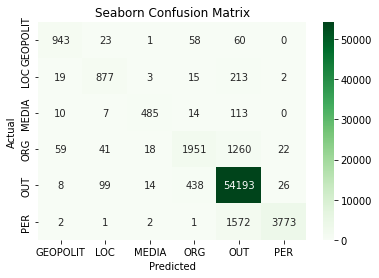

In [222]:
preds1 = mmodel1.predict(valid_x)
preds1 = np.argmax(preds1,axis=1)
print(f1_score(valid_y, preds1, average= "weighted"))
print('--------------------------------------------')
print(metrics.classification_report(valid_y, preds1))

cm = confusion_matrix(valid_y, preds1)
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Greens");

ax.set_title('Seaborn Confusion Matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])
ax.yaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])

plt.show()



## Одинаково